# Greedy Algorithmen

Diese Algorithmen werden immer dann verwendet, wenn eine **Lösung auf direktem Weg** erreicht werden kann. Ausgehend von einer momentanten Situation (lokale Informationen) wird diese dabei **schrittweise verbessert**. Von einer einmal verbesserten Situation gibt es keinen Weg zurück. Es werden **keine Alternativen probiert**. Kann eine Situation nicht weiter verbessert werden, dann steht das Ergebnis fest.

Nicht alle Probleme können mit Greedy Algorithmen gelöst werden. Aber zumeist sind zumindest Näherungslösungen machbar, die auf sehr schnellem Wege ermittelt werden können. In der Praxis ist die benötigte Zeit oft das wichtigere Kriterium. Im Folgenden werden einige Greedy-Algorithmen vorgestellt, die optimale Lösungen produzieren.

## Bruchteilrucksack

Im Gegensatz zum 0/1 Rucksackproblem, ist es beim Bruchteilrucksack erlaubt, auch Bruchteile von Gegenständen einzupacken. Werden 80 Prozent eines Gegenstands eingepackt, heißt das nichts anderes als das 80 Prozent seines Gewichts den Rucksack belasten und 80 Prozent seines Wertes den Rucksackwert erhöhen.

Bereits an dieser Stelle wird klar, dass es unter diesen Bedingungen möglich ist, den Rucksack exakt bis zu seiner Kapazitätsgrenze zu füllen. Es ist klar, dass Gegenstände mit hohem Wert und geringem Gewicht zu bevorzugen sind. Sortiert man die Gegenstände nach dem spezifischen Gewicht ($\frac{\text{Gewicht}}{\text{Wert}}$) erhält man eine priorisierte Liste. Durch das spezifische Gewicht werden die Gegenstände vergleichbar, denn es sagt aus, wie schwer der Gegenstand pro Werteinheit ist. *(Alternativ kann auch der spezifische Wert (Wert pro Gewichtseinheit) für eine absteigende Sortierung genutzt werden.)*  Die Gegenstände können nun, solange die Kapazitätsgrenze nicht überschritten wird, genau in der Reihenfolge ihrer Sortierung in den Rucksack gelegt werden. Der übrige Platz kann dann durch einen entsprechenden Bruchteil des nächsten Gegenstands aufgefüllt werden. Es wird an keiner Stelle ein Gegenstand wieder aus dem Rucksack entfernt und es gibt kein Probieren. Die Lösung wird direkt angesteuert.

In [40]:
import heapq # Priority Queue

def fracKnapsack(K, items):
    sort = []
    for item in items:
        heapq.heappush(sort,(item[0]/item[1],item)) # Gewicht/Wert
    knapsack = []
    weight = 0
    value = 0
    while len(sort):
        (sw,item) = heapq.heappop(sort)
        if weight + item[0] <= K: # passt vollständig in den Rucksack
            knapsack.append(item)
            weight += item[0]
            value += item[1]
        else: # Bruchteil in den Rucksack aufnehmen
            v = (K-weight)/sw # Verbleibender Wert des Bruchteils
            knapsack.append((K-weight,v))
            weight += K-weight
            value += v
            break # Rucksack ist voll
    return (knapsack, weight, value)

items = [(4, 7),(9, 1),(6, 9), (8, 6), (3, 1), (2, 5), (8, 7)] # (Gewicht, Wert)
print(fracKnapsack(15, items))

([(2, 5), (4, 7), (6, 9), (3, 2.625)], 15, 23.625)


**Hinweis:** *Das 0/1 Rucksackproblem ist mit der Greedy Strategie nicht lösbar. Die Gegenstände nach ihrem spezifischen Gewicht nacheinander einzupacken führt hier nicht immer zum optimalen Rucksack. Stünde z.B. ein Diamant (Wert 1000, Gewicht 90) und fünf Goldmünzen (jeweils Wert 210, Gewicht 20) für einen Rucksack, der ein Gewicht von 100 tragen kann, zur Auswahl, würde der Greedy Algorithmus den Diamanten einpacken und einen Rucksackwert von 1000 erreichen. Die optimale Lösung jedoch ist, stattdessen die fünf Goldmünzen zu nehmen (Wert 5 x 210 = 1050).*

## Geldwechselproblem

Beim Geldwechselproblem kann ganz ähnlich vorgegangen werden wie beim Bruchteilrucksack. Hier geht es darum, einen Geldbetrag in möglichst wenige Münzen einzutauschen. Der Betrag kann hier wie die Maximalkapazität beim Rucksackproblem behandelt werden. Die möglichen Münzen stellen bei dieser Analogie die Gegenstände dar. Der einzige Unterschied besteht darin, dass Münzen mehrfach ausgewählt werden können.

Nach absteigender Sortierung der möglichen Münzwerte wird nach und nach versucht den jeweils größten vom aktuellen Betrag abzuziehen. Wenn dies möglich ist, so wird die Münze dem Ergebnis hinzugefügt. Anderenfalls wird die Münze mit diesem Wert aus der Kandidatenliste entfernt, sodass im nächsten Durchlauf der nächstkleinere Münzwert verwendet wird. Folgendes Programm zeigt auch, dass eine rekursive Implementation von Greedy Algorithmen möglich ist.

In [3]:
def currencyExchangeRec(balance, candidates):
    if balance == 0:
        return []
    if (balance >= 0) and (len(candidates) == 0):
        return ['Failed']
    else:
        if balance >= candidates[0]:
            temp = [candidates[0]]
            return temp + currencyExchangeRec((balance - candidates[0]), candidates)
        else:
            return currencyExchangeRec(balance, candidates[1:])

def currencyExchange(balance, candidates):
    res = currencyExchangeRec(balance, candidates)
    if res[len(res)-1] == 'Failed':
        print('No exchange possible.')
    else:
        print(res)
        print(len(res))

balance = 985 #The value of the whole amount of money you want to change
candidates = [200, 100, 50, 20, 10, 5] #The value of each coin, e.g. 2€, 1€, 50ct...

currencyExchange(balance, candidates)

[200, 200, 200, 200, 100, 50, 20, 10, 5]
9


## Kürzeste Wege

Im Gegensatz zum TSP, wo eine kürzeste Rundreise gesucht wird, ist das Finden des kürzesten Weges zwischen zwei Knoten eines Graphen effizient möglich. Das wohl bekannteste Lösungsverfahren ist der **Algorithmus von Dijkstra**. Auch dieser verfolgt die Greedy Strategie ein momentanes Zwischenergebnis immer maximal zu verbessern. Am Beispiel des folgenden Graphen soll der kürzeste Weg von A nach E gefunden werden.

<img src="img/Greedy_Graph.png" width="300">

Ausgehend vom Startpunkt A werden zunächst alle angrenzenden Knoten ermittelt und an diesen die Länge des Weges bis dorthin  hinterlegt (Bild a). Zusätzlich merkt man sich den Vorgängerknoten von dem aus dieser Weg beschritten wurde (rote Pfeile). Im weiteren Verlauf wird nun unter den noch nicht verarbeiteten Knoten der mit dem kürzesten hinterlegten Weg untersucht (*das beste momentante Zwischenergebnis*, in Bild b Knoten C) und dessen angrenzende Knoten ermittelt (nur Knoten D, da A bereits verarbeitet wurde). Der am untersuchten Knoten hinterlegte Weg (der kürzeste Weg vom Startknoten bis dahin, bei Knoten C die Länge 2), erweitert um den Weg bis zum angrenzenden Knoten (3 bis nach D), wird nun mit dem am angrenzenden Knoten hinterlegten Weg (der kürzeste Weg vom Startknoten bis zu diesem) verglichen. Gibt es noch keinen hinterlegten Wert, so kann die momentan berechnete Länge gespeichert werden (in Bild b Speicherung von 5 zu Knoten D). Ist der momentane Weg kürzer als der bereits am angrenzenden Knoten hinterlegte Weg, dann wird dieser ersetzt (*Verbesserung des Zwischenergebnisses*, in Bild c passiert das mit Knoten B). Im gleichen Zuge wird auch der Vorgänger entsprechend geändert. Bild d zeigt, dass genau das Gleiche bei Knoten E passiert.

<img src="img/Greedy_Dijkstra.png" width="700">

Sobald der Zielknoten derjenige mit dem geringsten hinterlegten Weg ist, ist klar, dass dieser der Knoten mit der momentan kürzesten Distanz zum Startknoten ist. Es kann demzufolge keine kürzere Distanz zum Startknoten geben und der kürzeste Weg ist gefunden. Da an jedem Knoten der Vorgänger hinterlegt wurde von dem aus dieser kürzeste Weg zustande gekommen ist, kann durch Verfolgung der Vorgänger bis hin zum Startknoten der Weg rekonstruiert werden. Schlussendlich wird bei dieser Vorgehensweise jeder Knoten nur maximal ein Mal untersucht und bei jedem Besuch werden nur die noch nicht untersuchten Knoten aktualisiert, sofern sie vom aktuellen Knoten aus überhaupt erreichbar sind.

Folgendes Programm nutzt eine Entfernungsmatrix, um den Graphen zu repräsentieren. Diese enthält in jedem Feld die Entfernung von einem Ausgangsknoten (Zeilenindex) zu einem Zielknoten (Spaltenindex). Für Knoten die keine direkte Verbindung haben, wird eine Entfernung von Unendlich (`inf`) definiert. In der nach der hinterlegten Distanz sortierten Ausgangsknotenliste `nodes` wird der Startknoten mit einer Distanz von 0 markiert, sodass in der äußeren `while` Schleife mit diesem begonnen wird. Solange der Knoten mit der kürzestesten Distanz zum Startknoten (`n`) noch nicht der Zielknoten (Knotenindex `end`) ist, werden die verbleibenden Knoten (`nn`) aktualisiert. Durch Nutzung von `heapq` werden die verbleibenden Knoten (`nodes`) stets nach ihrer hinterlegten Mindestdistanz zum Startknoten sortiert.

In [37]:
import heapq # Priority Queue
inf = float("inf")
distanceMatrix = [
#nach A ,  B ,  C ,  D ,  E
    [inf,  11,   2, inf, inf], # von A
    [ 11, inf, inf,   5,   1], # von B
    [  2, inf, inf,   3, inf], # von C
    [inf,   5,   3, inf,   8], # von D
    [inf,   1, inf,   8, inf]  # von E
]
def shortestPathDijkstra(matrix, start, end):
    # für alle Knoten (Distanz, (Knotenindex, Vorgängerknoten)
    # Distanz = inf außer beim Start-Knoten, Vorgänger=None
    nodes = [(inf if i != start else 0, (i, None)) for i in range(len(matrix))]
    heapq.heapify(nodes)  # Heap-sortiert nach Distanz
    while len(nodes):  # Solange es nicht verarbeitete Knoten gibt
        n = heapq.heappop(nodes)  # Knoten mit der geringsten Distanz
        if n[1][0] == end:  # Index des Endknoten erreicht?
            result = [n[1][0]]  # Weg endet mit Endknoten
            r = n[1][1]  # Vorgänger auf dem Weg zum Endknoten
            while r:  # solange es noch Vorgänger gibt
                result = [r[0]] + result  # Weg um Vorgänger erweitern
                r = r[1]  # dessen Vorgänger ermitteln
            return (result, n[0])  # (Weg von start zu end, Länge)
        nextnodes = []  # Update der übrigen Knoten
        for nn in nodes:  # für alle noch nicht verarbeiteten Knoten
            if n[0] + matrix[n[1][0]][nn[1][0]] < nn[0]:  # kürzer von start zu nn?
                # Distanz und Vorgänger aktualisieren
                heapq.heappush(nextnodes, (n[0] + matrix[n[1][0]][nn[1][0]], (nn[1][0], n[1])))
            else: # anderenfalls unverändert in priority-queue übernehmen
                heapq.heappush(nextnodes, nn)
        nodes = nextnodes # aktualisierte Knoten für den nächsten Durchlauf
    return "bad input"

print(shortestPathDijkstra(distanceMatrix, 0, 4))

([0, 2, 3, 1, 4], 11)


Folgendes Programm nutzt den Dijkstra Algorithmus, um die kürzeste Verbindung zweier Punkte in einem Graphen zu finden. Graphen werden hier zufällig generiert und grafisch dargestellt, sodass eine visuelle Kontrolle erfolgen kann.

[(0, 7, 8.307523278366798), (1, 0, 9.77736928231171), (2, 8, 12.693951100081657), (3, 4, 9.993001942035932), (4, 9, 13.04392598250803), (5, 7, 7.985020608157423), (6, 5, 14.745220972850216), (7, 6, 8.563940567477786), (8, 0, 18.892951126378275), (9, 2, 3.3781573383815697)]
([0, 8, 2, 9], 34.9650595648415)


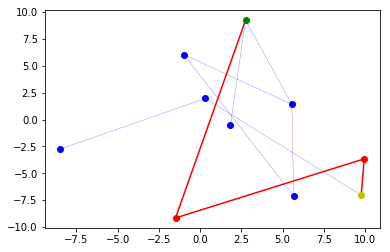

In [39]:
# Graph-Generator ----------------------------------------
def generateGraph(numberOfPoints, maxConnections):
    points = []  # (x,y), Name = Index
    edges = []  # (indexPoint1, indexPoint2, weight)
    if maxConnections < 1:
        maxConnections = 1

    for i in range(numberOfPoints):
        points.append((random.uniform(-10, 10), random.uniform(-10, 10)))

    def getPossibleConnections(edges, x, length):
        tempResult = []
        result = []
        for edge in edges:
            if edge[1] == x:
                tempResult.append(edge[0])
        for i in range(0, length):
            if i not in tempResult and i != x:
                result.append(i)
        return result

    def calcDistance(point1, point2):
        a = abs(point1[0] - point2[0])
        b = abs(point1[1] - point2[1])
        c_2 = a * a + b * b
        return math.sqrt(c_2)


    for i in range(len(points)):
        k = 0
        possibleConnections = getPossibleConnections(edges, i, len(points))
        n = round(random.uniform(1, maxConnections))
        while k < n:
            j = possibleConnections[round(random.uniform(0, len(possibleConnections)-1))]
            edges.append((i, j, calcDistance(points[i], points[j])))
            possibleConnections.remove(j)
            k = k + 1
    return (points, edges)

def pointsAndEdgesToDistanceMatrix(points, edges):
    m = [[inf for _ in points] for _ in points]
    for e in edges:
        m[e[0]][e[1]] = m[e[1]][e[0]] = e[2]
    return m

# Execution ------------------------------------------------------------

(points, edges) = generateGraph(10,1)
print(edges)
distanceMatrix = pointsAndEdgesToDistanceMatrix(points, edges)
dijkstraResult = shortestPathDijkstra(distanceMatrix, 0, len(points) - 1)
print(dijkstraResult)
dijkstraWay = dijkstraResult[0]

# Plotting -----------------------------------------------------------

fig = plt.subplot()

pointsX = []
pointsY = []

for point in points:
    pointsX.append(point[0])
    pointsY.append(point[1])

for edge in edges:
    tempX = [points[edge[0]][0], points[edge[1]][0]]
    tempY = [points[edge[0]][1], points[edge[1]][1]]
    fig.plot(tempX, tempY, "r", color="blue", linewidth="0.2")

dijkstraPointsX = []
dijkstraPointsY = []

for index in dijkstraWay:
    dijkstraPointsX.append(points[index][0])
    dijkstraPointsY.append(points[index][1])

fig.plot(dijkstraPointsX, dijkstraPointsY, "r", color="red")

for i in range(0, len(pointsX)):
    if i in dijkstraWay:
        if i == dijkstraWay[0]:
            fig.plot(pointsX[i], pointsY[i], "go")
        else:
            if i == dijkstraWay[len(dijkstraWay)-1]:
                fig.plot(pointsX[i], pointsY[i], "yo")
            else:
                fig.plot(pointsX[i], pointsY[i], "ro")
    else:
        fig.plot(pointsX[i], pointsY[i], "bo")

plt.show()
